In [1]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

피봇테이블
- 가지고 있는 데이터 원본을 원하는 형태로 가공된 정보를 보여주는 것
- 자료의 형태를 변경하기 위해 많이 사용하는 방법

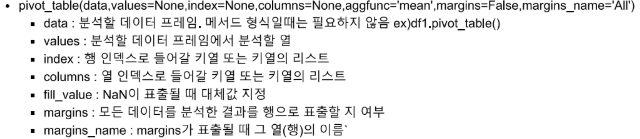

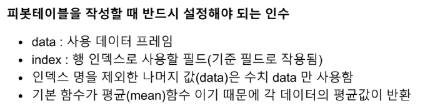

In [2]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}

columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [3]:
# 각 도시에 대한 연도별 인구 평균
df1.pivot_table(index='도시', columns='연도', values='인구')

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [4]:
# 각 지역별 도시에 대한 연도별 인구 평균
df1.pivot_table(index=["지역", "도시"], columns='연도', values='인구')

연도           2005       2010       2015
지역  도시                                 
경상권 부산  3512547.0  3393191.0  3448737.0
수도권 서울  9762546.0  9631482.0  9904312.0
    인천        NaN   263203.0  2890451.0

In [5]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')[['age', 'sex', 'class', 'fare', 'survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [13]:
# 선실 등급별 숙박객의 성별 평균 나이
pdf1 = pd.pivot_table(df,
                      index='class',
                      columns='sex',
                      values='age', 
                      aggfunc='mean',
                      observed=True
                      )
pdf1

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [14]:
# 각 선실 등급별 숙박객의 성별에 따른 생존자 수와 생존률
pdf2 = pd.pivot_table(df,
                      index='class',
                      columns='sex',
                      values='survived', 
                      aggfunc=['mean', 'sum'],
                      observed=True
                      )
pdf2

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [16]:
# 선실 등급에 따른 성별에 대해 생존여부별로 나이와 티켓값의 평균, 최댓값 산출
pdf3 = pd.pivot_table(df,
                      index=['class', 'sex'],
                      columns='survived',
                      values=['age', 'fare'],
                      aggfunc=['mean', 'max'],
                      observed=True
                      )
pdf3

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

- 그룹 분석
    - 그룹 분석은 피봇테이블과 달리 키에 의해서 결정되는 데이터가 여러개가 있을 경우 미리 지정한 연산을 통해 그 그룹데이터의 대표값을 계산하는 것

- groupby 메서드
    - 인수 : 열 또는 열의 리스트 / 행 인덱스

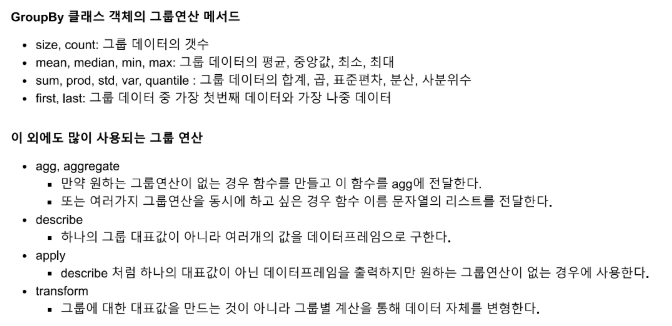

In [18]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1':['A', 'A', 'B', 'B', 'A'],
    'key2':['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [19]:
groups = df2.groupby(df2.key1)
groups

In [20]:
# groups 속성을 확인하면 그룹핑된 요약을 볼 수 있음
groups.groups

# 딕셔너리 반환
# {그룹명 : 그룹에 포함된 행인덱스}
groups.groups.keys()
groups.groups['A']

{'A': [0, 1, 4], 'B': [2, 3]}

dict_keys(['A', 'B'])

Index([0, 1, 4], dtype='int64')

In [21]:
pd.DataFrame(groups)

,0,1
0,A,key1 key2 data1 data2 0 A one 1 ...
1,B,key1 key2 data1 data2 2 B one 3 ...


In [22]:
pd.DataFrame(groups).loc[0].values

array(['A',   key1 key2  data1  data2
            0    A  one      1     10
            1    A  two      2     20
            4    A  one      5     50], dtype=object)